Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. 
Проверьте размер таблицы, типы переменных.

# Описание данных

user_data:

client – идентификатор пользователя

premium – является ли клиент премиум

age – возраст

logs:

client – идентификатор пользователя

success – результат (успех - 1, нет - 0)

platform – платформа

time – время в формате Unix




In [24]:
import pandas as pd

user_data = pd.read_csv('3_user_data.csv')
logs = pd.read_csv('3_logs.csv')

In [8]:
user_data.head()


,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [9]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [11]:
user_data.shape

(2954, 3)

In [12]:
logs.shape

(4500, 4)

In [13]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [14]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

# Задание 1 

Вопрос: Сколько уникальных значений принимает переменная platform?

In [19]:
unique_logs_platform = logs['platform'].nunique()
print("Количество уникальных значений platform в logs: ", unique_logs_platform)

Количество уникальных значений platform в logs:  3


# Задание 2

С какой платформы осуществляется наибольшее количество успешных операций? (success == True)


Подсказка: вспомните команды из прошлого занятия 

Название_датафрейма.query('success == True').platform.value_counts()

а еще команда idxmax()

In [25]:
successful_operations = logs.query('success == True')

# успешные операции для каждой платформы
count = successful_operations['platform'].value_counts()
# платформа с самым большим количеством операций
top_platform = count.idxmax()

print ("Наибольшее количество успешных операций осуществлено на платформе: ", top_platform)

Наибольшее количество успешных операций осуществлено на платформе:  phone


# Задание 3

Какой клиент совершил больше всего успешных операций?

Внимание: Несколько пользователей могли совершить одинаковое число успешных действий

Подсказка: вспомните команды из прошлого урока 

Название_датафрейма.query('success == True').client.value_counts()

также поможет команда max()

In [29]:
successful_operations = logs.query('success == True')

# Количество успешных операций для каждого пользователя
operations_per_client = successful_operations['client'].value_counts()

# Клиент с наибольшим количеством успешных операций
client_top_successful_operations = operations_per_client.idxmax()

print ("Клиент с наибольшим количеством успешных операций: ", client_top_successful_operations)
operations_per_client

Клиент с наибольшим количеством успешных операций:  28719


client
28719    41
52870    41
61468    41
61473    41
12179    41
         ..
70028     1
37123     1
73522     1
38359     1
40921     1
Name: count, Length: 2845, dtype: int64

# Задание 4

Объедините два датафрейма в один по столбцу 'client'

Подсказка: Название_датафрейма_1.merge(Название_датафрейма_2, on='client')

In [25]:
merged_tables = logs.merge(user_data, on='client')

merged_tables.shape
merged_tables.head

<bound method NDFrame.head of       client  success  platform        time  premium  age
0      61468     True     phone  1585425658    False   25
1      35604    False     phone  1585459894     True   65
2      10931     True  computer  1585468629    False   28
3      41928     True     phone  1585446772    False   46
4      48925     True     phone  1585467880    False   33
...      ...      ...       ...         ...      ...  ...
3434   92584     True  computer  1585408896    False   28
3435   95152     True  computer  1585420263    False   67
3436   64496    False  computer  1585459072    False   66
3437    8967     True     phone  1585465121    False   33
3438   40921     True     phone  1585437692    False   45

[3439 rows x 6 columns]>

# Задание 5

Какая платформа наиболее популярна среди премиумных клиентов? (premium == True)

In [39]:
# соединяем таблицы
popular_platforms=user_data.query('premium == True').merge(logs, on='client')

# находим самую популярную платформу
most_popular_platform=popular_platforms['platform'].value_counts().idxmax()

print("Самая популярная платформа: ", most_popular_platform)


Самая популярная платформа:  phone


In [ ]:
Задание 5

Сделайте выборку для премиальных клиентов (premium` == True) и для непримеальных.

На основе этих выборок постройте графики, первый - отображающий популярность использования различных платформ (столбец "platform") у премиальных пользователей и второй - платформы сради непримиальных пользователей. 

Подсказка: используйте sns.countplot(x=название_выборки["столбец"])

In [13]:
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:

import matplotlib.pyplot as plt

In [15]:
# Выбираем премиальных пользователей 
premium_users = user_data.query('premium == True')

#соединяем таблицы
premium = premium_users.merge(logs, on='client')

In [16]:
# Непримиальные клиенты
non_premium_users = user_data.query('premium == False')
non_premium = non_premium_users.merge(logs, on='client')

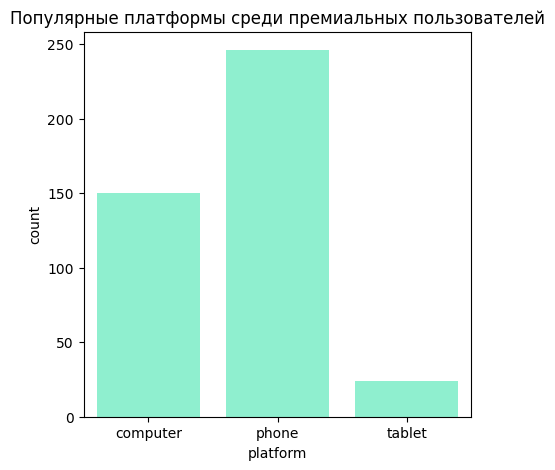

In [20]:
# Строим график для премиальных клиентов
plt.figure(figsize=(5, 5))
sns.countplot(x=premium['platform'], color='aquamarine')
plt.title('Популярные платформы среди премиальных пользователей')
plt.show()

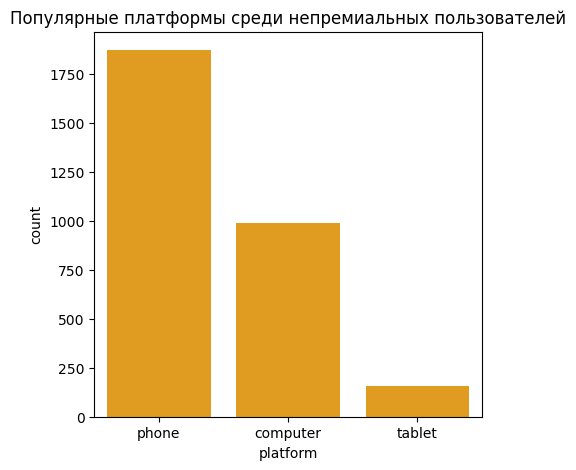

In [21]:
# График для непремиальных клиентов
plt.figure(figsize=(5, 5))
sns.countplot(x=non_premium['platform'], color='orange')
plt.title('Популярные платформы среди непремиальных пользователей')
plt.show()

Задание 7

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. 

Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки.

Подсказка: sns.countplot(data=Название_Датафрейма.loc[(Название_Датафрейма.platform == 'computer')
                                   & (Название_Датафрейма.success == True)], x='age')

In [28]:
%pip install seaborn
import seaborn as sns

In [29]:

merged_tables = logs.merge(user_data[['client', 'age']], on='client')
successful_operations = merged_df.loc[(merged_tables['platform'] == 'computer') & (merged_df['success'] == True)]



<Figure size 1200x800 with 0 Axes>

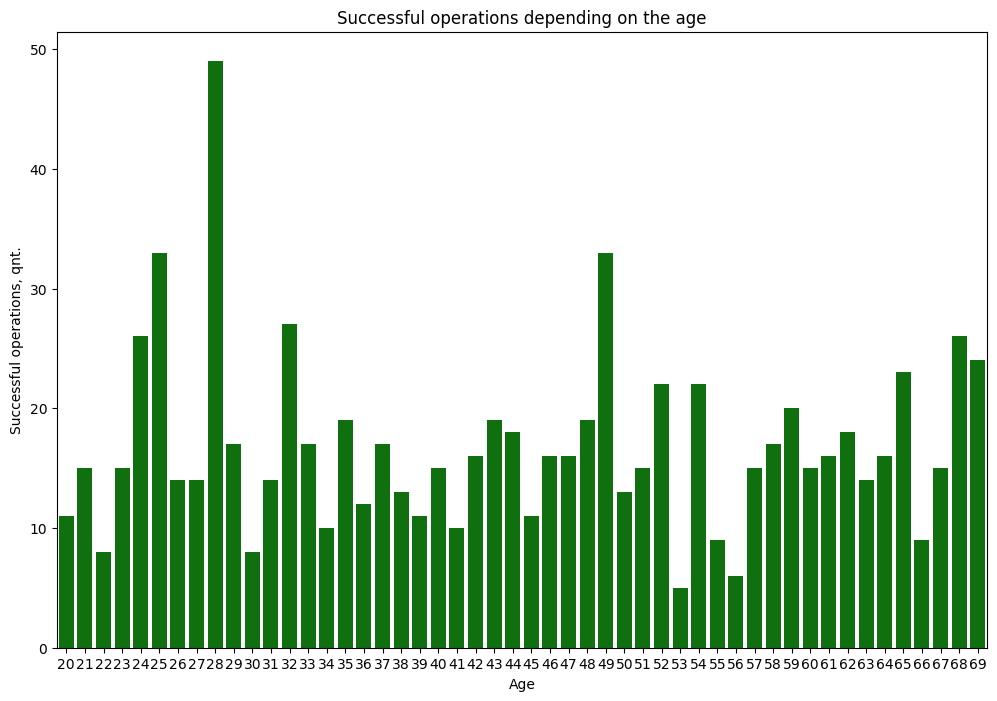

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

#объединяем таблицы
computer_success = merged_df.loc[(merged_df['platform'] == 'computer') & (merged_df['success'] == True)]

plt.figure(figsize=(12, 8))
sns.countplot(data=computer_success, color='green', x='age')
plt.title('Successful operations depending on the age')
plt.xlabel('Age')
plt.ylabel('Successful operations, qnt.')
plt.show()
